## Data Loading and Exploration

#### Import Libraries

In [189]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as scs

#### Import Dataset

In [190]:
df = pd.read_csv("stroke data.csv")

#### Dataset Head

In [191]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Dataset Shape/Dimensions

In [192]:
df.shape

(5110, 12)

#### Dataset Data Types

In [193]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18928\3126118313.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


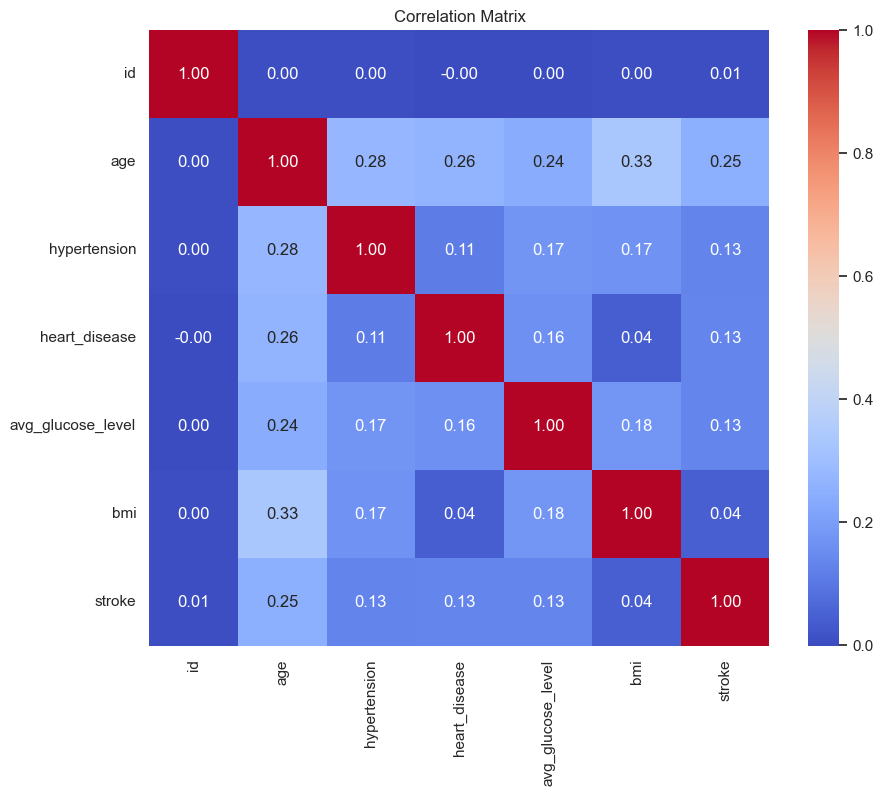

In [194]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
snb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [195]:
#convert age in to integer
# Convert 'age' column to integer
df['age'] = df['age'].astype(int)

#### Describe Dataset 

In [196]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [197]:
print(df['gender'].value_counts())
print(df['smoking_status'].value_counts())
print(df['work_type'].value_counts())
print(df['Residence_type'].value_counts())
print(df['smoking_status'].value_counts())

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


### Data Visualization

#### Count Plot for Smoking Status

Text(0.5, 1.0, 'Stroke patients by Smoking status')

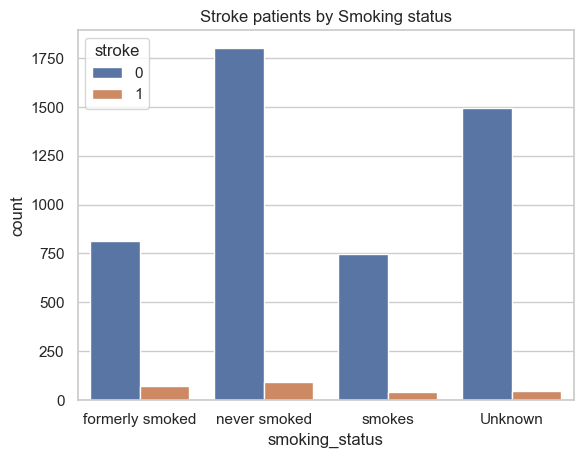

In [198]:
snb.countplot(x='smoking_status', hue='stroke', data=df).set_title('Stroke patients by Smoking status')

#### Count Plot for Residence type

Text(0.5, 1.0, 'Stroke patients by Residence Type')

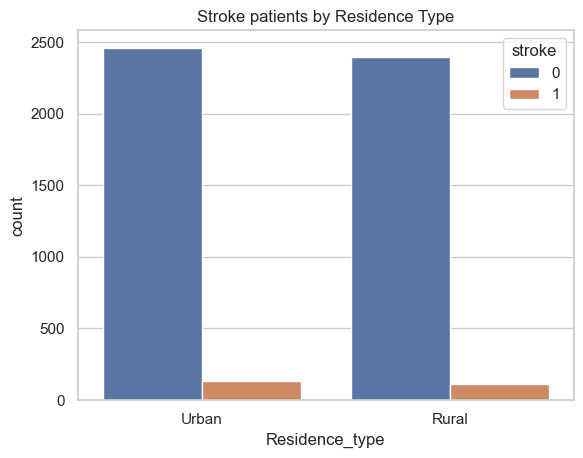

In [199]:
snb.countplot(x='Residence_type', hue='stroke', data=df).set_title('Stroke patients by Residence Type')

#### Count plot for work type

Text(0.5, 1.0, 'Stroke patients by Work type')

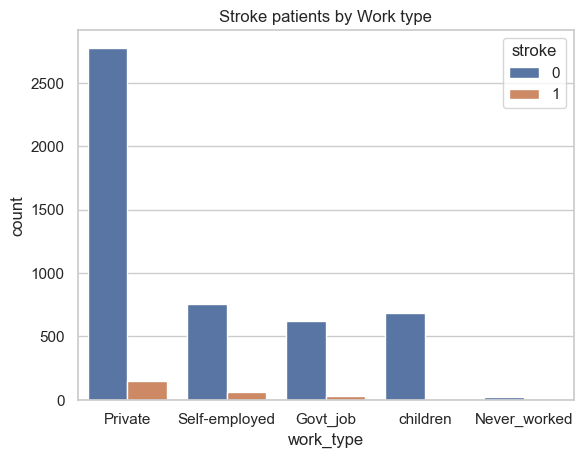

In [200]:
snb.countplot(x='work_type', hue='stroke', data=df).set_title('Stroke patients by Work type')

#### Count plot for martial status

Text(0.5, 1.0, 'Stroke patients by Martial Status')

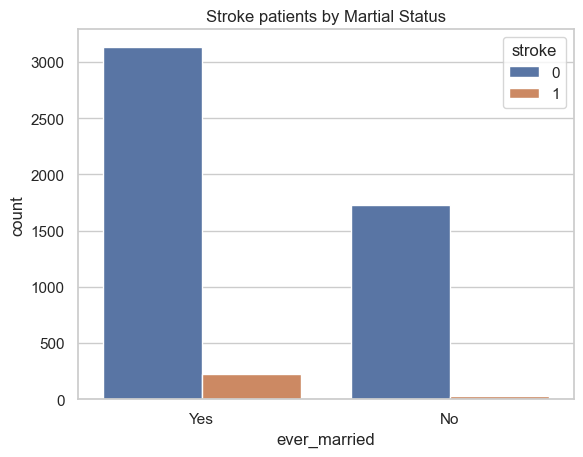

In [201]:
snb.countplot(x='ever_married', hue='stroke', data=df).set_title('Stroke patients by Martial Status')

#### Count Plot for Heart Disease

Text(0.5, 1.0, 'Stroke patients by Heart Disease')

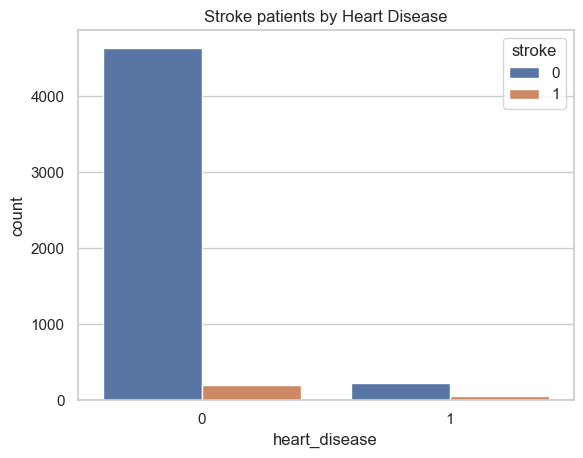

In [202]:
snb.countplot(x='heart_disease', hue='stroke', data=df).set_title('Stroke patients by Heart Disease')

#### Count plot for Hypertension

Text(0.5, 1.0, 'Stroke patients by Hypertension')

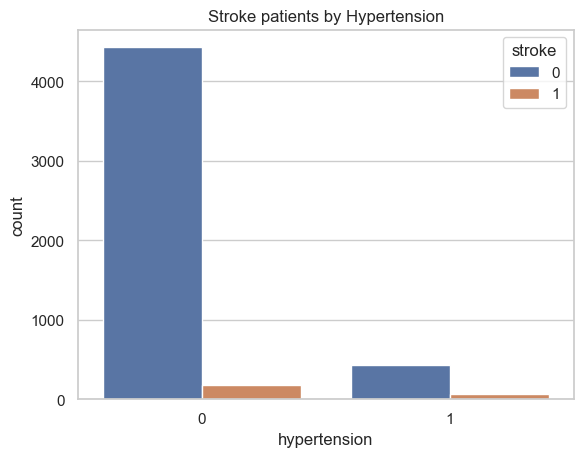

In [203]:
snb.countplot(x='hypertension', hue='stroke', data=df).set_title('Stroke patients by Hypertension')

#### Count plot for Gender

Text(0.5, 1.0, 'Stroke patients by Gender')

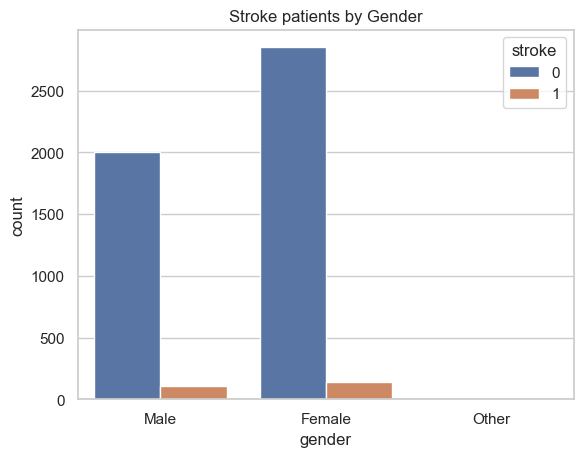

In [204]:
snb.countplot(x='gender', hue='stroke', data=df).set_title('Stroke patients by Gender')

#### Box Plots for Age, BMI , Average GLucose Level 

Text(0.5, 1.0, 'BoxPlot for Average Glucose Level')

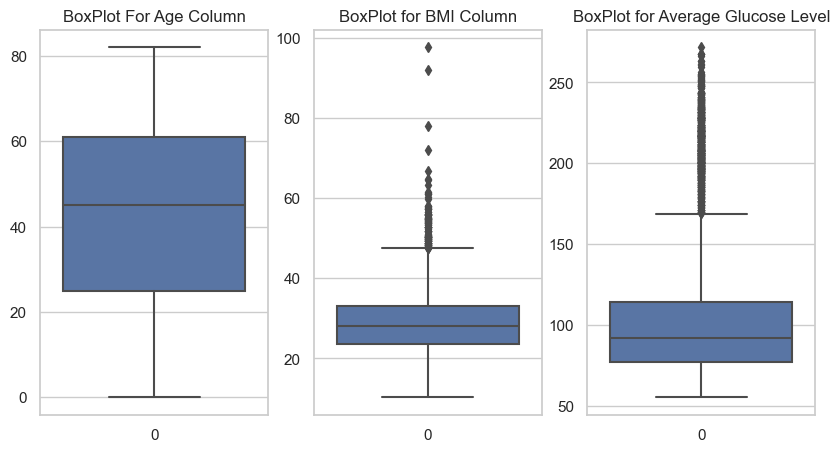

In [205]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))
snb.boxplot(df['age'], ax=axes[0]).set_title("BoxPlot For Age Column")
snb.boxplot(df['bmi'],ax=axes[1]).set_title("BoxPlot for BMI Column")
snb.boxplot(df['avg_glucose_level'],ax=axes[2]).set_title("BoxPlot for Average Glucose Level")

#####  #  Identified some Outliers in BMI , Average GLucose Level 

#### Distribution Of Age

Text(0.5, 1.0, 'Distribution Of Age')

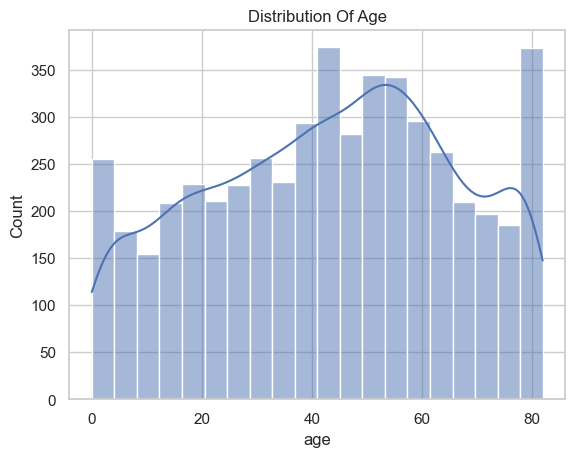

In [206]:
snb.histplot(data=df,x='age',kde=True).set_title("Distribution Of Age")

#### Distribution of Average of Glucose Level

Text(0.5, 1.0, 'Distribution Of Average Glucose Level')

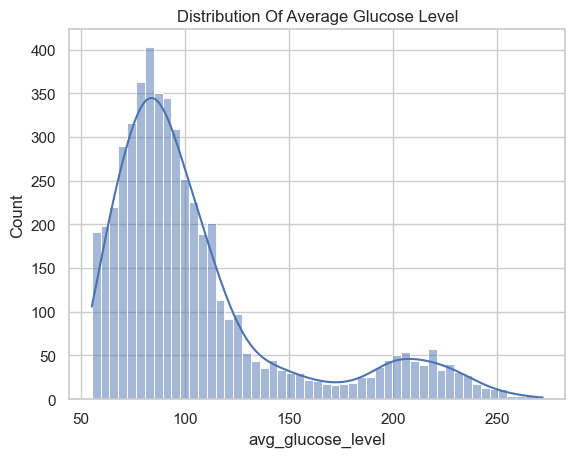

In [207]:
snb.histplot(data=df,x='avg_glucose_level',kde=True).set_title("Distribution Of Average Glucose Level")

#### Distribution of BMI

Text(0.5, 1.0, 'Distribution of BMI')

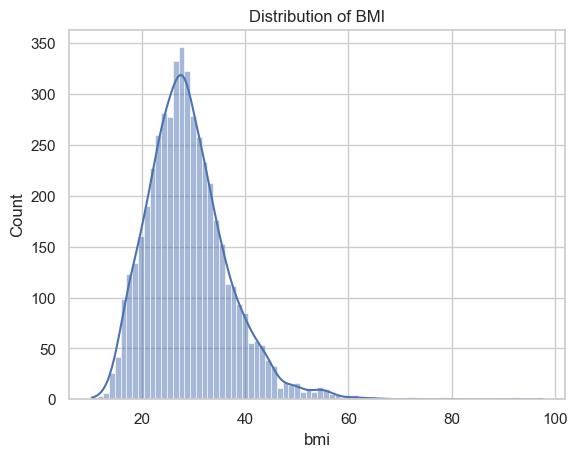

In [208]:
snb.histplot(data=df,x='bmi',kde=True).set_title("Distribution of BMI")

#### Line Plot for Age with Age

Text(0.5, 1.0, 'Line Plot for Age with Stroke')

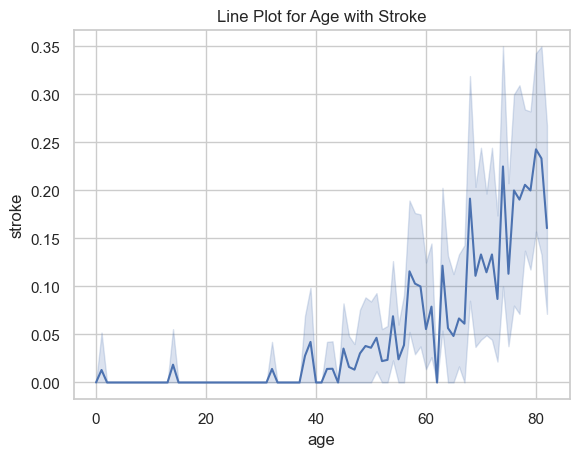

In [209]:
snb.lineplot(data=df,x='age',y='stroke').set_title("Line Plot for Age with Stroke")

#### Line Plot for Glucose level with Stroke

Text(0.5, 1.0, 'Line Plot for Glucose Level with Stroke')

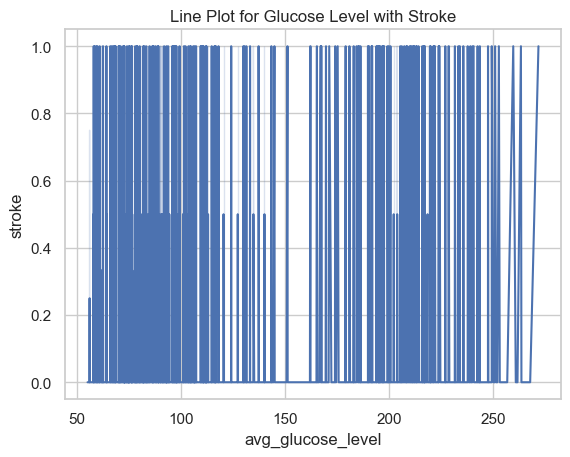

In [210]:
snb.lineplot(data=df,x='avg_glucose_level',y='stroke').set_title("Line Plot for Glucose Level with Stroke")

#### Line Plot for BMI with Stroke

Text(0.5, 1.0, 'Line Plot for BMI with Stroke')

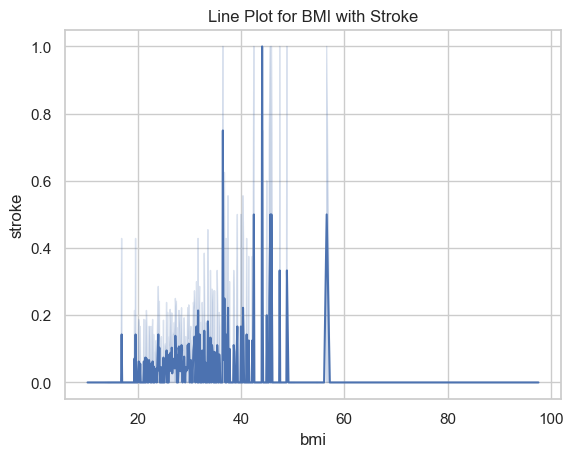

In [211]:
snb.lineplot(data=df,x='bmi',y='stroke').set_title("Line Plot for BMI with Stroke")

#### Stroke Patients In Pie Chart

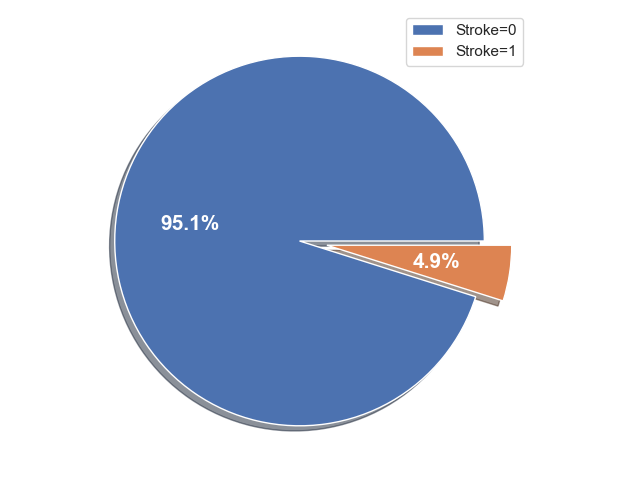

In [212]:
x = df['stroke'].value_counts()


explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=True, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()

#### Gender , work type, martial status, residence type , smoking status in pie charts

In [213]:
def pieplot(df, column):
    label = df[column].unique().tolist()
    data = df[column].value_counts()
    plt.figure(figsize = (4, 4))
    plt.pie(data, labels = label, autopct = "%.0f%%")
    plt.title(column)

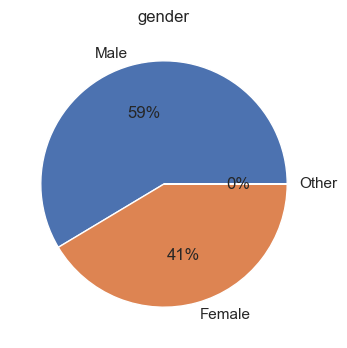

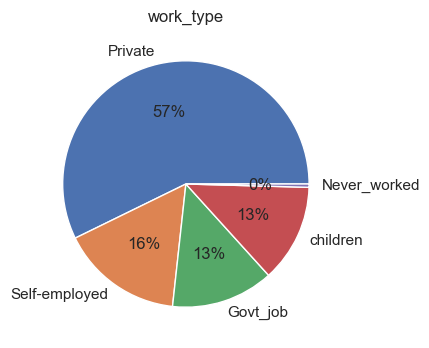

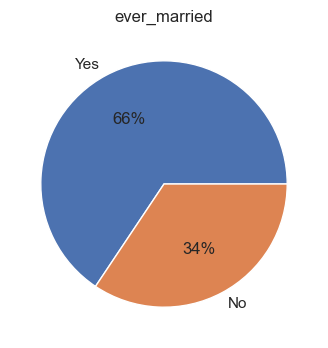

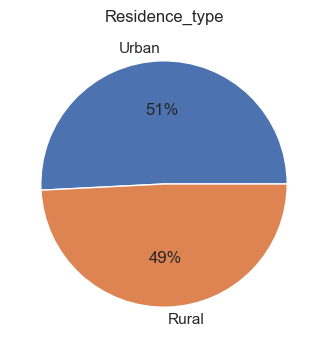

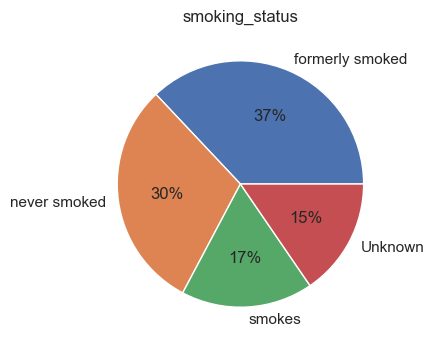

In [214]:
lists_of_plots = ["gender", "work_type", "ever_married", "Residence_type", "smoking_status"]
for i in range(len(lists_of_plots)):
    pieplot(df, lists_of_plots[i])

#### All the above pie charts at one chart

In [215]:
numeric_columns = ['age', 'bmi', 'avg_glucose_level']
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']

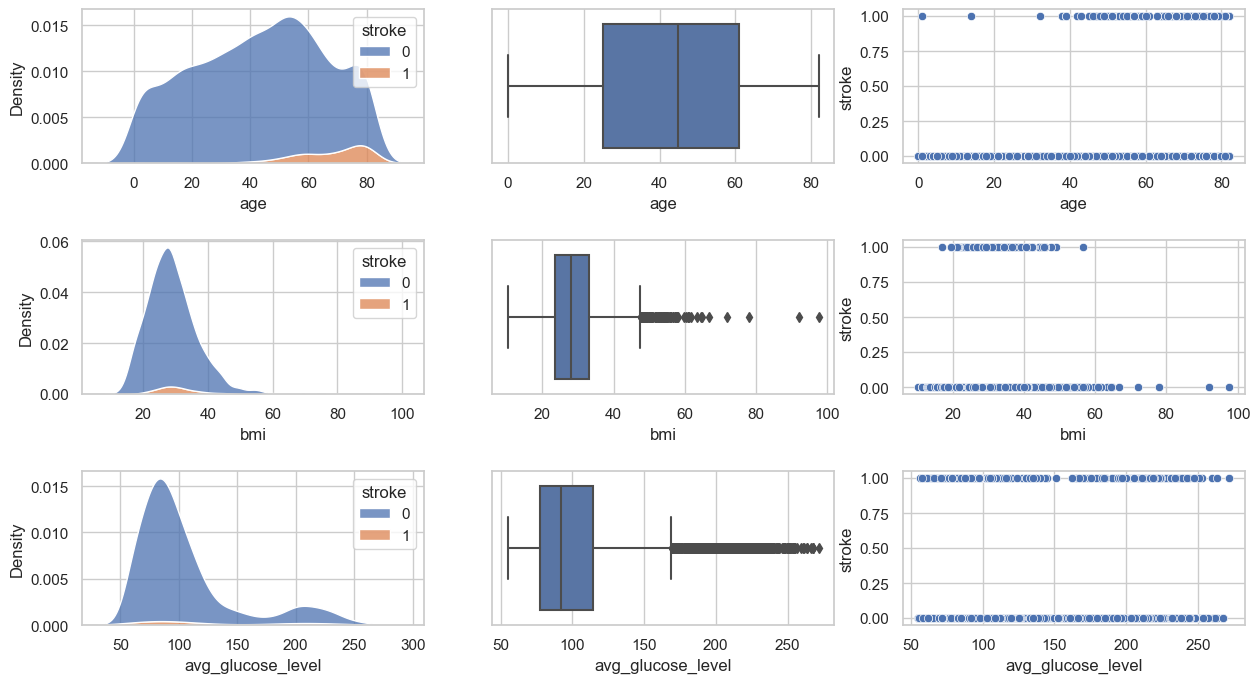

In [216]:
i = 0
fig, ax = plt.subplots(3, 3, figsize=(15, 8))
plt.subplots_adjust(hspace = 0.5)
for num_col in numeric_columns :
    snb.kdeplot(x=num_col, hue='stroke', data=df, multiple='stack', ax=ax[i,0])
    snb.boxplot(x=num_col, data=df, ax=ax[i, 1])
    snb.scatterplot(x=num_col, y='stroke', data=df, ax=ax[i, 2])
    i+=1
plt.show()

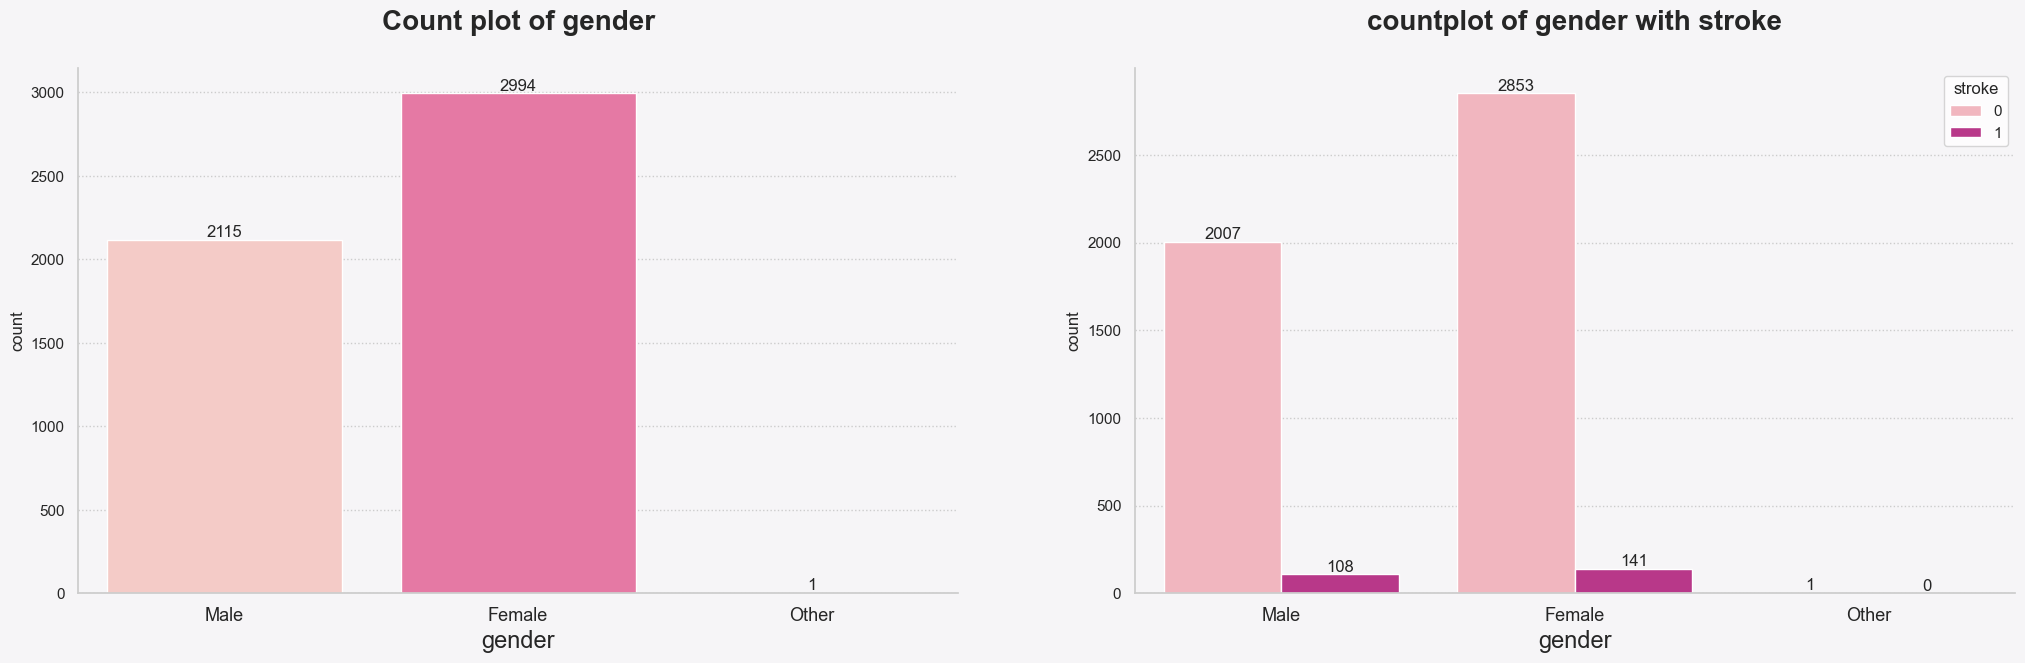

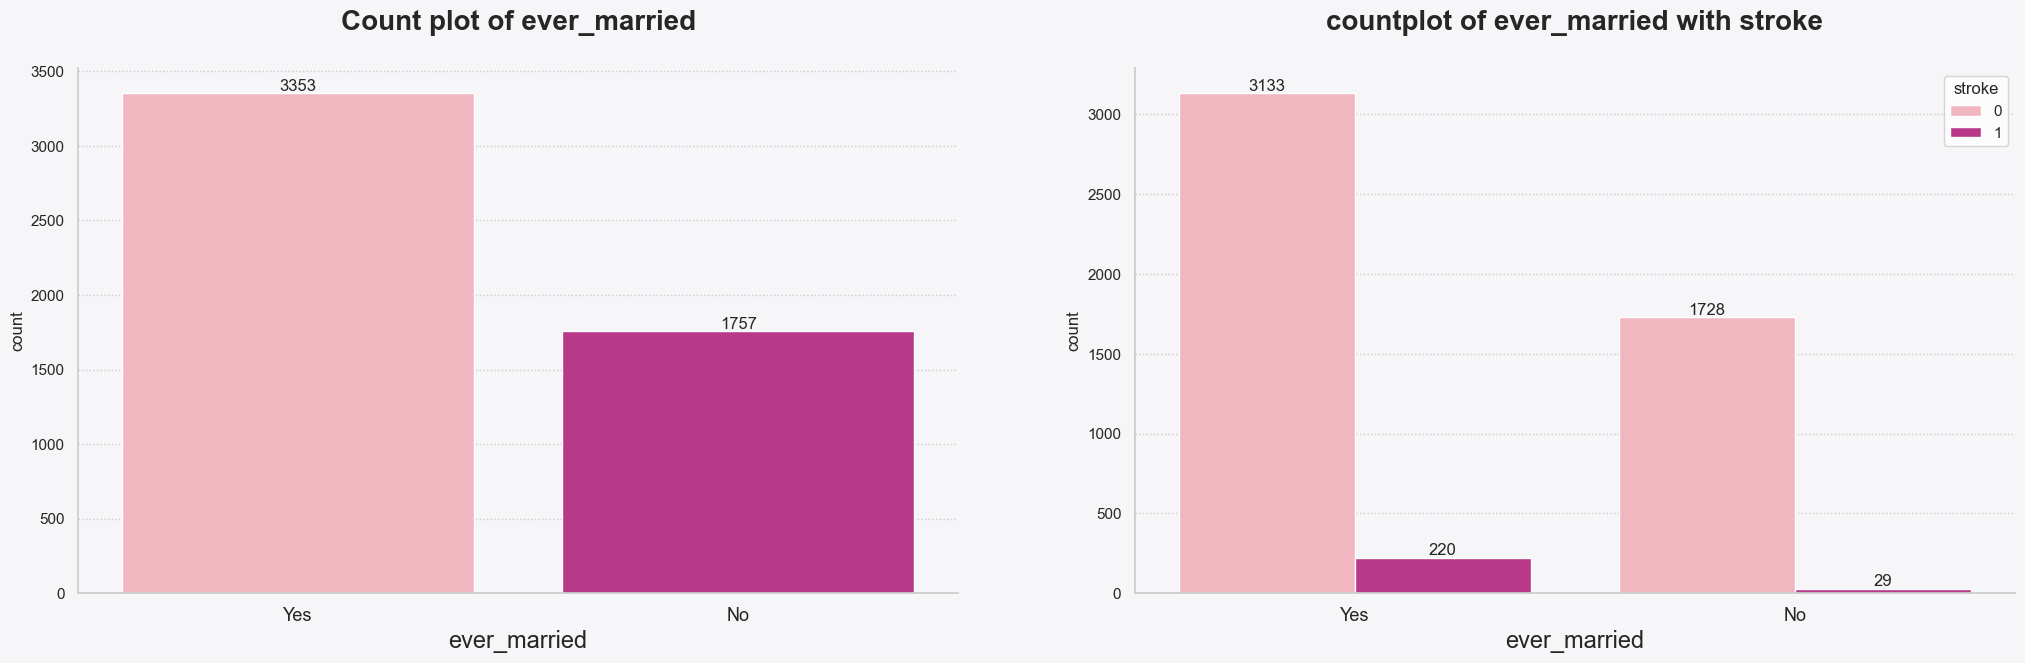

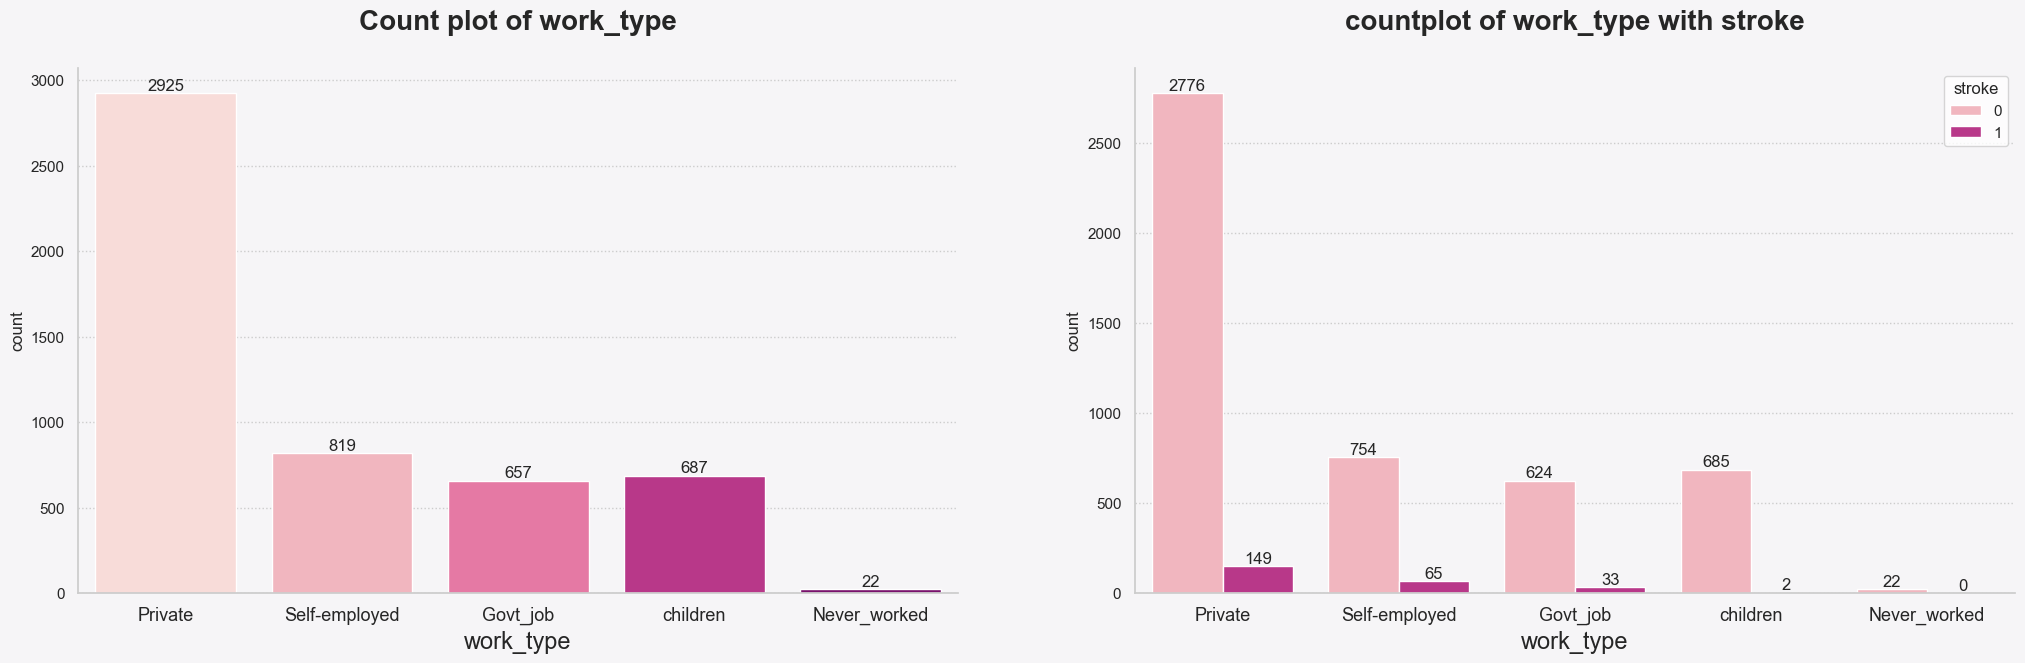

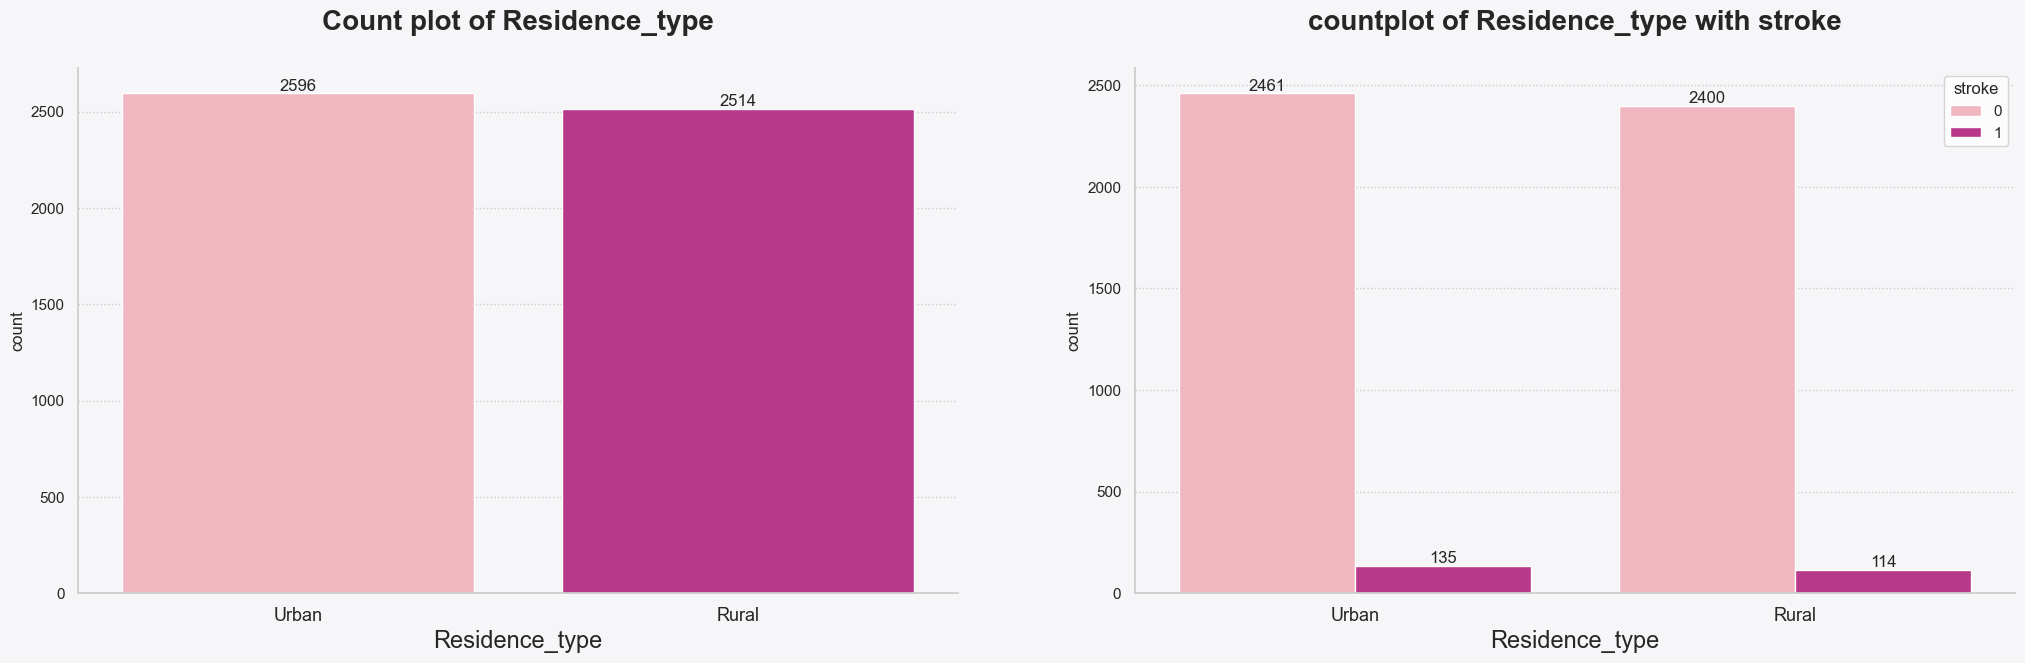

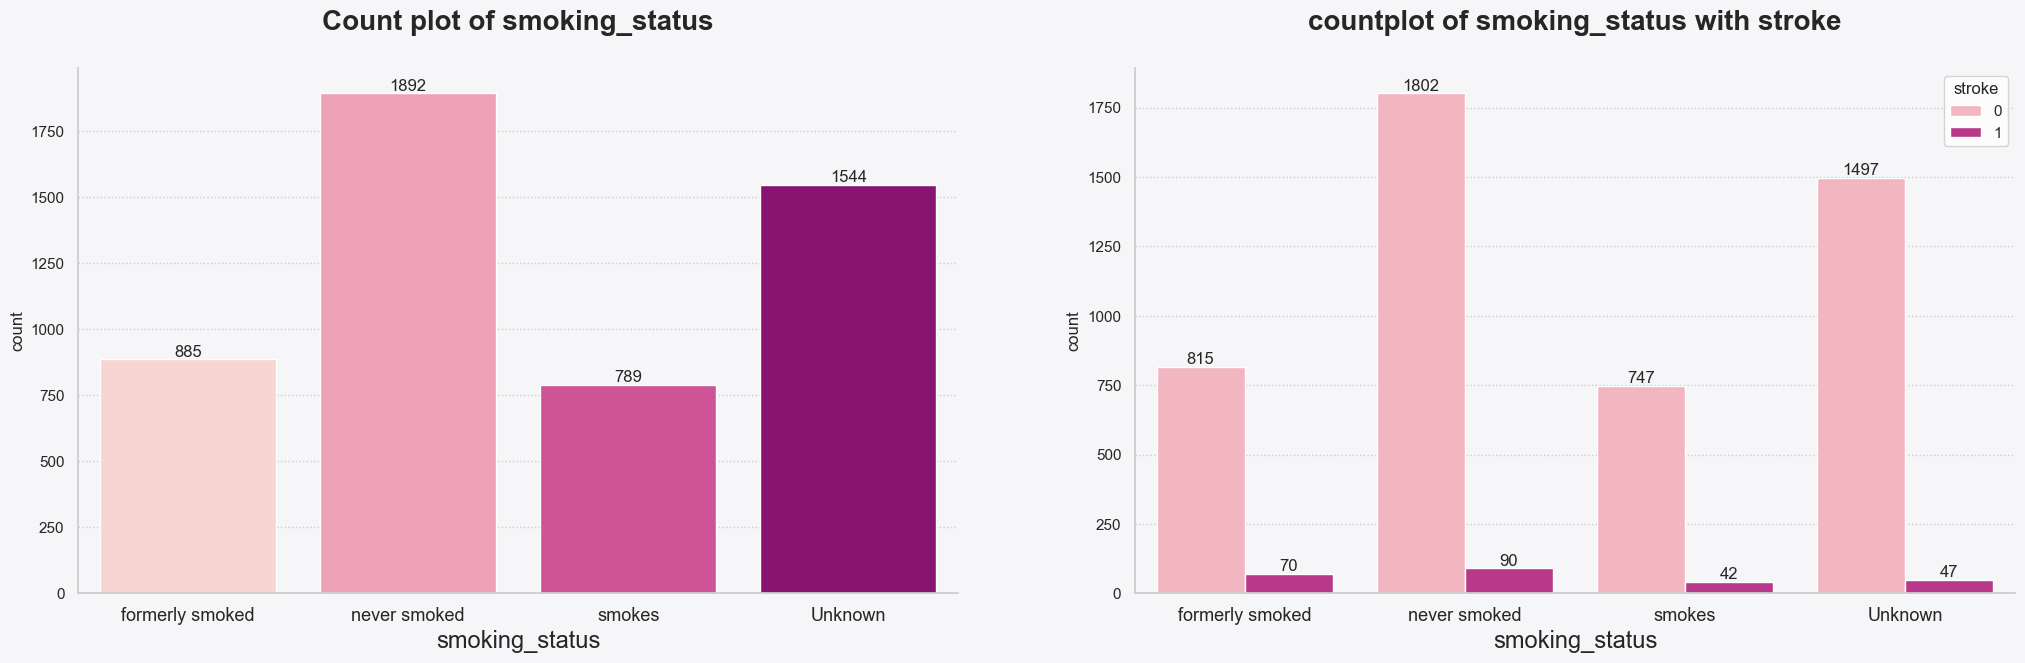

In [217]:
for i in df.columns:
    if df[i].dtype == "object":
        
        fig=plt.figure(figsize=(25,15))
        fig.patch.set_facecolor("#f6f5f7")
        
        xx=plt.subplot(2,2,1)
        xx.set_facecolor("#f6f5f7")
        x=snb.countplot(data=df, x=i,palette='RdPu')
        for container in x.containers:
            x.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"Count plot of {i}\n",fontsize=20,weight="bold")
        for x in ["top","right"]:
            xx.spines[x].set_visible(False)
        xx.grid(linestyle=':',axis='y')
        
    
    
        
        vv=plt.subplot(2,2,2)
        vv.set_facecolor("#f6f5f7")
        v=snb.countplot(data=df,x=i,hue="stroke",palette='RdPu')
        for container in v.containers:
            v.bar_label(container)
        plt.xticks(fontsize=13)
        plt.xlabel(i,fontsize=17)
        plt.ylabel("count",fontsize=12)
        plt.title(f"countplot of {i} with stroke\n",fontsize=20,weight="bold" )
        for v in ["top","right"]:
            vv.spines[v].set_visible(False)
        vv.grid(linestyle=':',axis='y')
        plt.show()

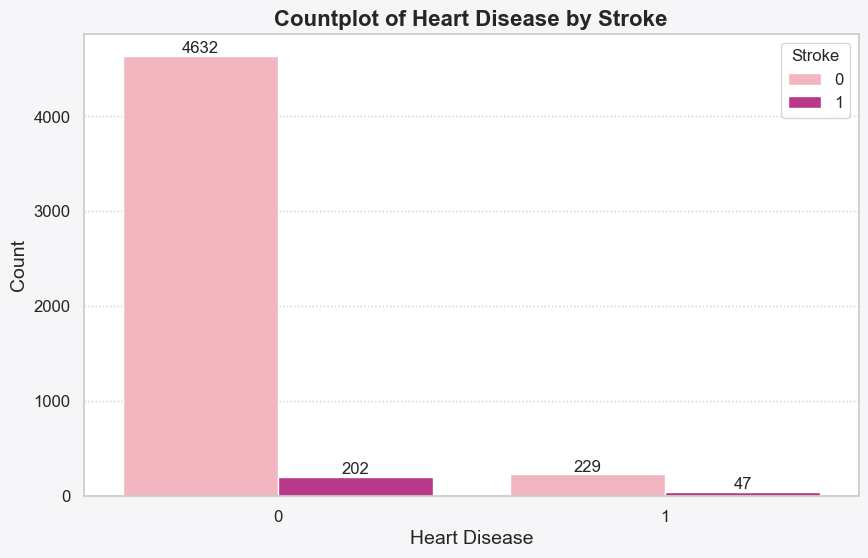

In [218]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor("#f6f5f7")

ax = sns.countplot(data=df, x='heart_disease', hue='stroke', palette='RdPu')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.xlabel('Heart Disease', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Countplot of Heart Disease by Stroke', fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Stroke', fontsize=12)
plt.grid(linestyle=':', axis='y')
plt.show()


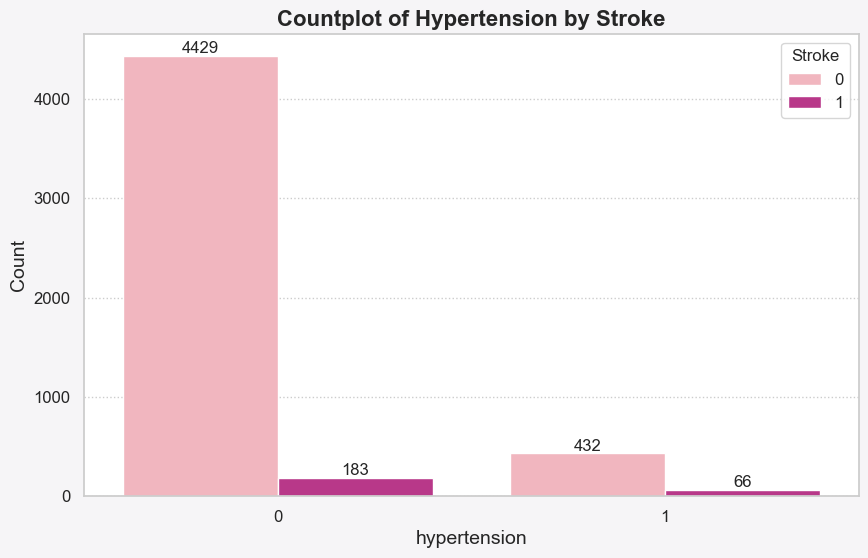

In [219]:
fig = plt.figure(figsize=(10, 6))
fig.patch.set_facecolor("#f6f5f7")

ax = sns.countplot(data=df, x='hypertension', hue='stroke', palette='RdPu')

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge')

plt.xlabel('hypertension', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Countplot of Hypertension by Stroke', fontsize=16, weight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Stroke', fontsize=12)
plt.grid(linestyle=':', axis='y')
plt.show()

## Data Cleaning

### Handling Missing Values

In [220]:
#checking missing values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### Imputation bmi

###### Mode of the bmi

In [221]:
df['bmi'].mode()

0    28.7
Name: bmi, dtype: float64

In [222]:
#filling null values
df['bmi'].fillna(28.7,inplace=True)

In [223]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Handling Outliers

Text(0.5, 1.0, 'BoxPlot for Average Glucose Level')

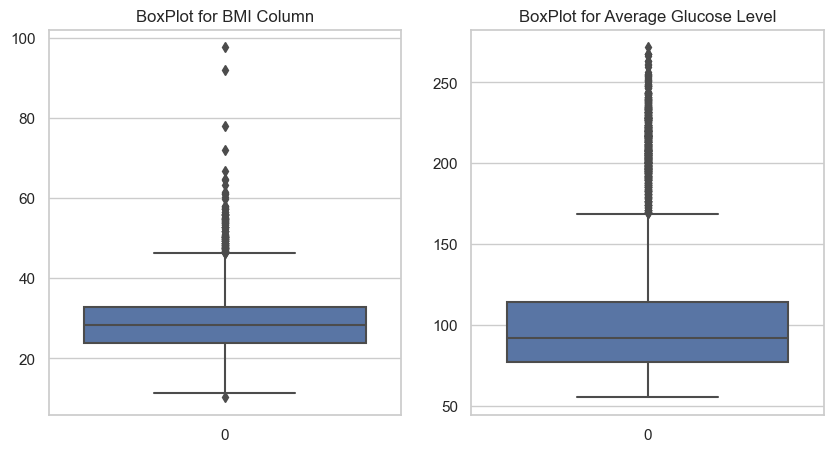

In [224]:
#identifing outliers
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

snb.boxplot(df['bmi'],ax=axes[0]).set_title("BoxPlot for BMI Column")
snb.boxplot(df['avg_glucose_level'],ax=axes[1]).set_title("BoxPlot for Average Glucose Level")

##### Removing Identified Outliers

In [225]:
# removing detected outliers iteratively from avg_glucose_level
def remove_outliers_iqr_iterative(df, column, max_iterations=3):
    for i in range(max_iterations):
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # filter dataframe to exclude outliers
        df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)] 
        df = df_filtered.copy()
    return df

In [226]:
# Call the function to remove outliers from 'avg_glucose_level' column iteratively
df = remove_outliers_iqr_iterative(df, 'avg_glucose_level', max_iterations=3)

<Axes: ylabel='avg_glucose_level'>

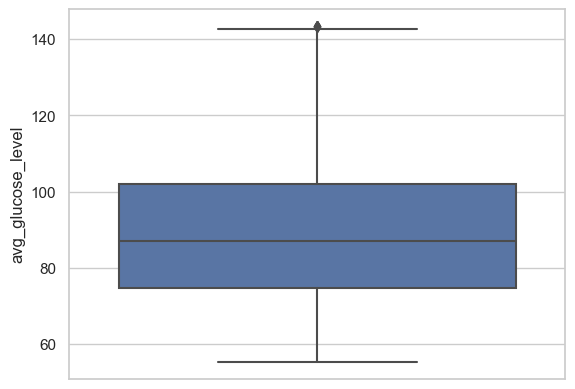

In [227]:
#PLOT OULTLIERS REMOVED avg_glucose_level
snb.boxplot(y=df['avg_glucose_level'])

In [228]:
df = remove_outliers_iqr_iterative(df, 'bmi', max_iterations=3)

<Axes: ylabel='bmi'>

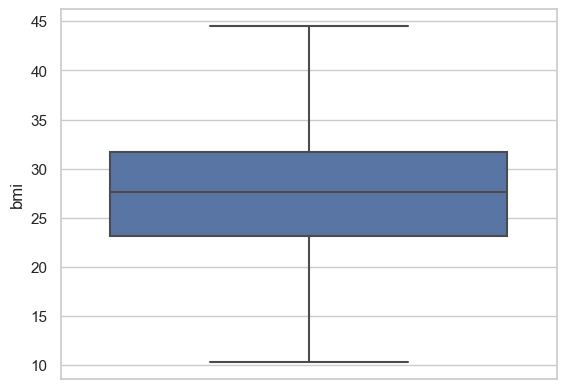

In [229]:
snb.boxplot(y=df['bmi'])

#### Duplicates in the dataset

In [230]:
df.duplicated().sum()

0

## Data Preprocessing

#### Converting Categorical varaibles to numerical

In [231]:
#Label Encoding
df['gender'] = df['gender'].replace({'Male':0,'Female':1,'Other':2})
df['ever_married'] = df['ever_married'].replace({'Yes': 0, 'No': 1})
df['work_type'] = df['work_type'].replace({'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4})
df['smoking_status'] = df['smoking_status'].replace({'formerly smoked': 0, 'never smoked': 1, 'smokes': 2, 'Unknown': 3})
df['Residence_type'] = df['Residence_type'].replace({'Urban': 0, 'Rural': 1})

In [232]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2,31112,0,80,0,1,0,0,1,105.92,32.5,1,1
6,53882,0,74,1,1,0,0,1,70.09,27.4,1,1
7,10434,1,69,0,0,1,0,0,94.39,22.8,1,1
8,27419,1,59,0,0,0,0,1,76.15,28.7,3,1
9,60491,1,78,0,0,0,0,0,58.57,24.2,3,1


### Descriptive Analysis

#### Central Tendency

In [233]:
# Mean Age
df['age'].mean()

40.80394955983821

In [234]:
#median of age
df['age'].median()

42.0

In [235]:
#mode of age
df['age'].mode()

0    45
Name: age, dtype: int32

In [236]:
#Mean glucose value
df['avg_glucose_level'].mean()

89.17609802522009

In [237]:
#Median of the glucose level
df['avg_glucose_level'].median()

87.09

In [238]:
#Mode of the avg_glucose_level
df['avg_glucose_level'].mode()

0    93.88
Name: avg_glucose_level, dtype: float64

In [239]:
#Mean bmi
df['bmi'].mean()

27.653438020461575

In [240]:
#Median bmi
df['bmi'].median()

27.6

In [241]:
#Mode bmi
df['bmi'].mode()

0    28.7
Name: bmi, dtype: float64

In [242]:
#Mode of Hypertension
df['hypertension'].mode()

0    0
Name: hypertension, dtype: int64

In [243]:
#Mode of Heart disease
df['heart_disease'].mode()

0    0
Name: heart_disease, dtype: int64

In [244]:
#Mode of Ever married
df['ever_married'].mode()
#No == 0

0    0
Name: ever_married, dtype: int64

In [245]:
#Mode of work type
df['work_type'].mode()
#Private == 0

0    0
Name: work_type, dtype: int64

In [246]:
#Mode of Residence type
df['Residence_type'].mode()
#Urban == 0

0    0
Name: Residence_type, dtype: int64

In [247]:
#Mode of Smoking status
df['smoking_status'].mode()
# never smoked ==1

0    1
Name: smoking_status, dtype: int64

In [248]:
# import shutil

# df.to_csv('stroke_data.csv', index=False)

# source_path = 'stroke_data.csv'

# destination_path = 'F:\Year 2 Sem 2\Data Science in Python\Cleaned data\stroke_data.csv'

# shutil.move(source_path, destination_path)


In [249]:
# Measures of Position
percentiles = [0.25, 0.50, 0.75]  # Corrected percentiles
age_percentiles = df['age'].quantile(percentiles)
glucose_level_percentiles = df['avg_glucose_level'].quantile(percentiles)
bmi_percentiles = df['bmi'].quantile(percentiles)

print("Age Percentiles:")
print(age_percentiles)
print("Average Glucose Level Percentiles:")
print(glucose_level_percentiles)
print("BMI Percentiles:")
print(bmi_percentiles)

Age Percentiles:
0.25    22.0
0.50    42.0
0.75    58.0
Name: age, dtype: float64
Average Glucose Level Percentiles:
0.25     74.595
0.50     87.090
0.75    102.005
Name: avg_glucose_level, dtype: float64
BMI Percentiles:
0.25    23.1
0.50    27.6
0.75    31.7
Name: bmi, dtype: float64


Age Percentiles:

The 25th percentile (Q1) of the age distribution is approximately 0.27.
The median (50th percentile, Q2) age is around 0.51.
The 75th percentile (Q3) of the age distribution is roughly 0.71.
This suggests that the age distribution is positively skewed, as the median is closer to the lower quartile than the upper quartile.

Average Glucose Level Percentiles:

The 25th percentile (Q1) of the average glucose level is approximately 0.22.
The median (50th percentile, Q2) glucose level is around 0.36.
The 75th percentile (Q3) of the average glucose level is roughly 0.53.
Similarly, the distribution of average glucose levels appears to be positively skewed, with the median closer to the lower quartile.

BMI Percentiles:

The 25th percentile (Q1) of the BMI distribution is approximately 0.37.
The median (50th percentile, Q2) BMI is around 0.51.
The 75th percentile (Q3) of the BMI distribution is roughly 0.63.
The BMI distribution also seems to be positively skewed, with the median closer to the lower quartile.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18928\513683792.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snb.kdeplot(df['age'], shade=True, label='Age')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18928\513683792.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snb.kdeplot(df['avg_glucose_level'], shade=True, label='Average Glucose Level')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18928\513683792.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snb.kdeplot(df['bmi'], shade=True, label='BMI')


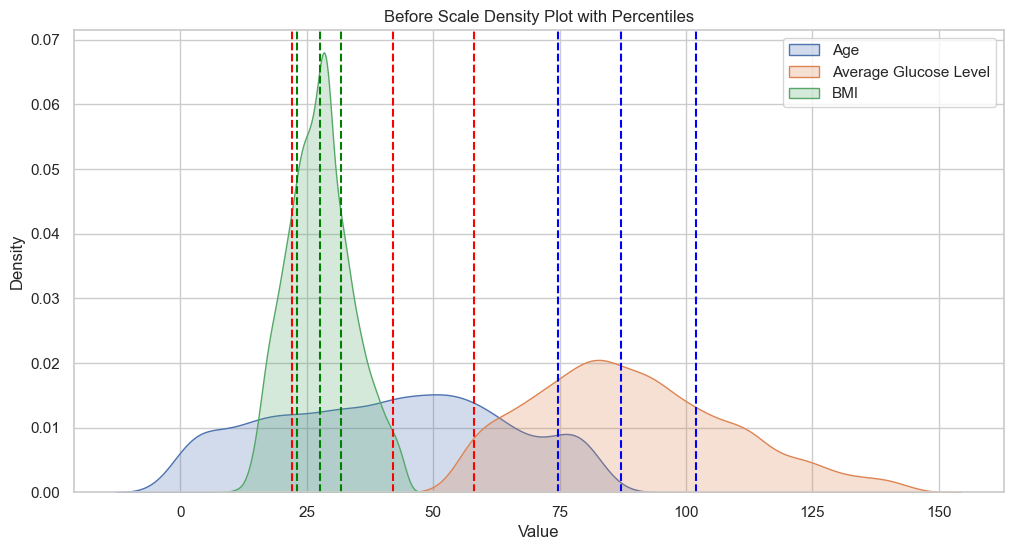

In [250]:
plt.figure(figsize=(12, 6))

# Age Density Plot
snb.kdeplot(df['age'], shade=True, label='Age')

# Add percentile lines
for p in age_percentiles:
    plt.axvline(p, color='red', linestyle='--')

# Glucose Level Density Plot
snb.kdeplot(df['avg_glucose_level'], shade=True, label='Average Glucose Level')

# Add percentile lines
for p in glucose_level_percentiles:
    plt.axvline(p, color='blue', linestyle='--')

# BMI Density Plot
snb.kdeplot(df['bmi'], shade=True, label='BMI')

# Add percentile lines
for p in bmi_percentiles:
    plt.axvline(p, color='green', linestyle='--')

# Add legend and labels
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Before Scale Density Plot with Percentiles')
plt.show()

#### Feature Scaling

In [251]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
numerical_columns = ['age','avg_glucose_level', 'bmi']
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18928\254645733.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snb.kdeplot(df['age'], shade=True, label='Age')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18928\254645733.py:19: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snb.kdeplot(df['avg_glucose_level'], shade=True, label='Average Glucose Level')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18928\254645733.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  snb.kdeplot(df['bmi'], shade=True, label='BMI')


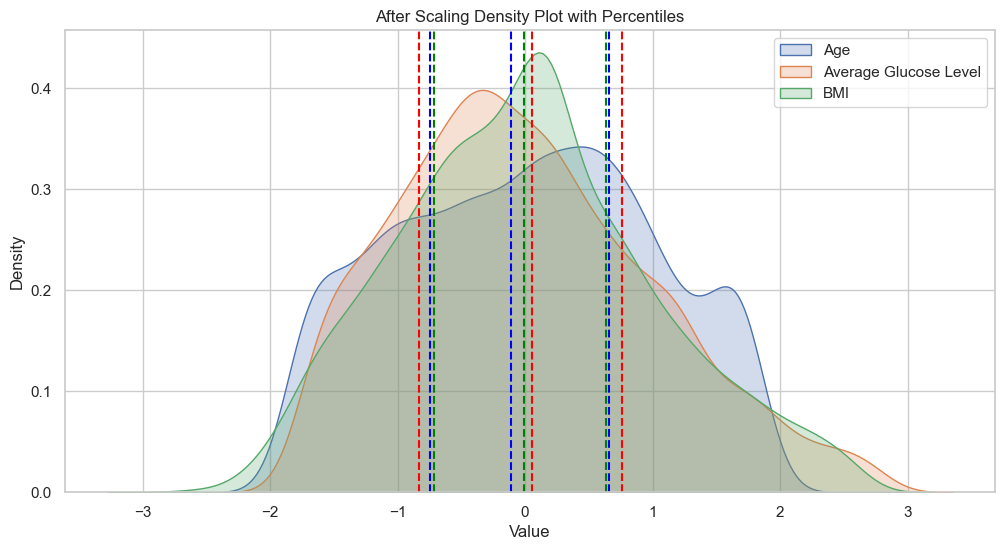

In [252]:
# Assuming 'df' is your DataFrame containing the stroke dataset

# Set percentile values
age_percentiles = [25, 50, 75]
glucose_level_percentiles = [25, 50, 75]
bmi_percentiles = [25, 50, 75]

# Create a figure
plt.figure(figsize=(12, 6))

# Age Density Plot
snb.kdeplot(df['age'], shade=True, label='Age')

# Add percentile lines for age
for p in age_percentiles:
    plt.axvline(df['age'].quantile(p/100), color='red', linestyle='--')

# Glucose Level Density Plot
snb.kdeplot(df['avg_glucose_level'], shade=True, label='Average Glucose Level')

# Add percentile lines for glucose level
for p in glucose_level_percentiles:
    plt.axvline(df['avg_glucose_level'].quantile(p/100), color='blue', linestyle='--')

# BMI Density Plot
snb.kdeplot(df['bmi'], shade=True, label='BMI')

# Add percentile lines for BMI
for p in bmi_percentiles:
    plt.axvline(df['bmi'].quantile(p/100), color='green', linestyle='--')

# Add legend and labels
plt.legend()
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('After Scaling Density Plot with Percentiles')
plt.show()


In [253]:
#Measures of Variability
age_range = df['age'].max() - df['age'].min()
glucose_level_range = df['avg_glucose_level'].max() - df['avg_glucose_level'].min()
bmi_range = df['bmi'].max() - df['bmi'].min()

age_variance = df['age'].var()
glucose_level_variance = df['avg_glucose_level'].var()
bmi_variance = df['bmi'].var()

age_std_deviation = df['age'].std()
glucose_level_std_deviation = df['avg_glucose_level'].std()
bmi_std_deviation = df['bmi'].std()

# Print the results
print(f"Age Range: {age_range}")
print(f"Glucose Level Range: {glucose_level_range:.2f}")
print(f"BMI Range: {bmi_range:.2f}")

print(f"Age Variance: {age_variance:.2f}")
print(f"Glucose Level Variance: {glucose_level_variance:.2f}")
print(f"BMI Variance: {bmi_variance:.2f}")

print(f"Age Standard Deviation: {age_std_deviation:.2f}")
print(f"Glucose Level Standard Deviation: {glucose_level_std_deviation:.2f}")
print(f"BMI Standard Deviation: {bmi_std_deviation:.2f}")

Age Range: 3.6275040514178407
Glucose Level Range: 4.54
BMI Range: 5.34
Age Variance: 1.00
Glucose Level Variance: 1.00
BMI Variance: 1.00
Age Standard Deviation: 1.00
Glucose Level Standard Deviation: 1.00
BMI Standard Deviation: 1.00


Range:

Age Range: The difference between the maximum and minimum ages in the dataset is approximately 3.63 years.

Glucose Level Range: The difference between the maximum and minimum average glucose levels in the dataset is approximately 4.54 units.

BMI Range: The difference between the maximum and minimum BMI values in the dataset is approximately 5.34 units.

Interpretation: The range provides a measure of the spread of values within each numerical variable. It shows the extent of variability in the dataset but doesn't consider all data points.

Variance:

Age Variance: The variance of ages in the dataset is approximately 1.00.

Glucose Level Variance: The variance of average glucose levels in the dataset is approximately 1.00.

BMI Variance: The variance of BMI values in the dataset is approximately 1.00.

Interpretation: Variance measures the average squared deviation of each data point from the mean. A higher variance indicates greater dispersion of data points around the mean, while a lower variance suggests less dispersion.

Standard Deviation:

Age Standard Deviation: The standard deviation of ages in the dataset is approximately 1.00.

Glucose Level Standard Deviation: The standard deviation of average glucose levels in the dataset is approximately 1.00.

BMI Standard Deviation: The standard deviation of BMI values in the dataset is approximately 1.00.

Interpretation: Standard deviation is a measure of the amount of variation or dispersion of a set of values. It indicates the average distance of data points from the mean. A higher standard deviation implies greater variability in the dataset, while a lower standard deviation suggests less variability.

### Visualizations

In [254]:
#set the style for seaborn plots
snb.set(style="whitegrid")

#  numerical variables for Visualization
numerical_columns = ['age','avg_glucose_level', 'bmi']

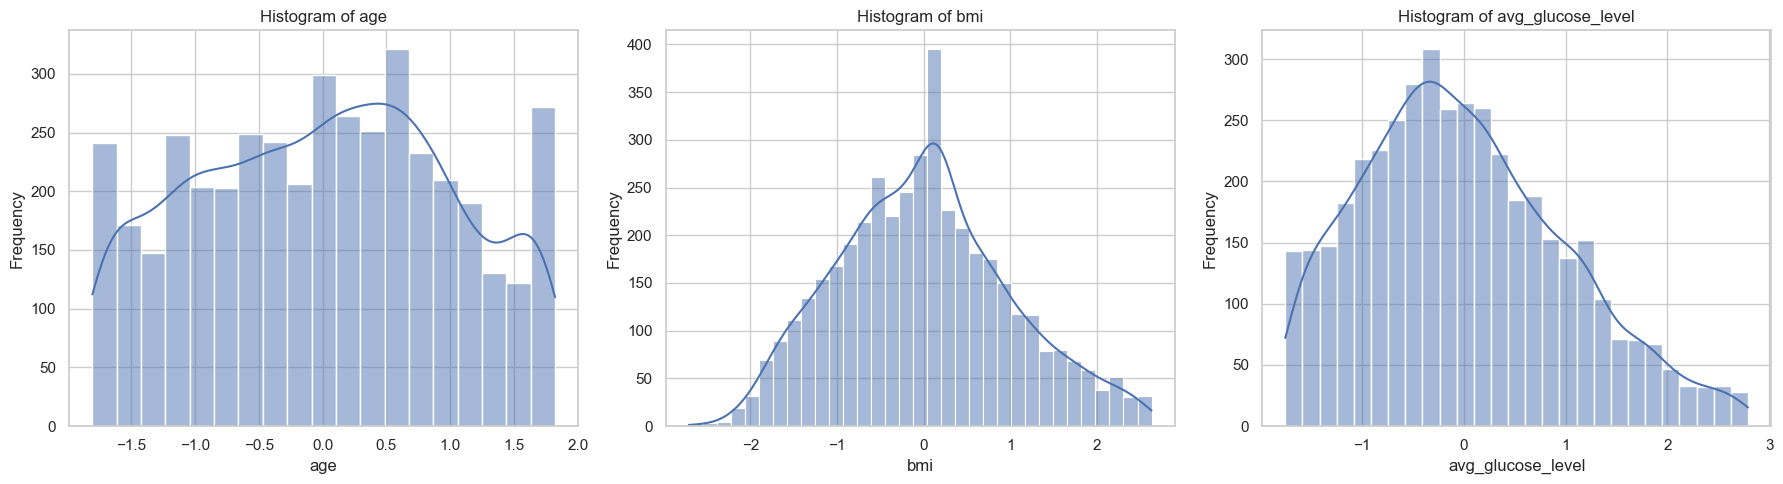

In [255]:
plt.figure(figsize=(18,5))
for i,var in enumerate(numeric_columns,1):
    plt.subplot(1,3,i)
    snb.histplot(df[var],kde=True)
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

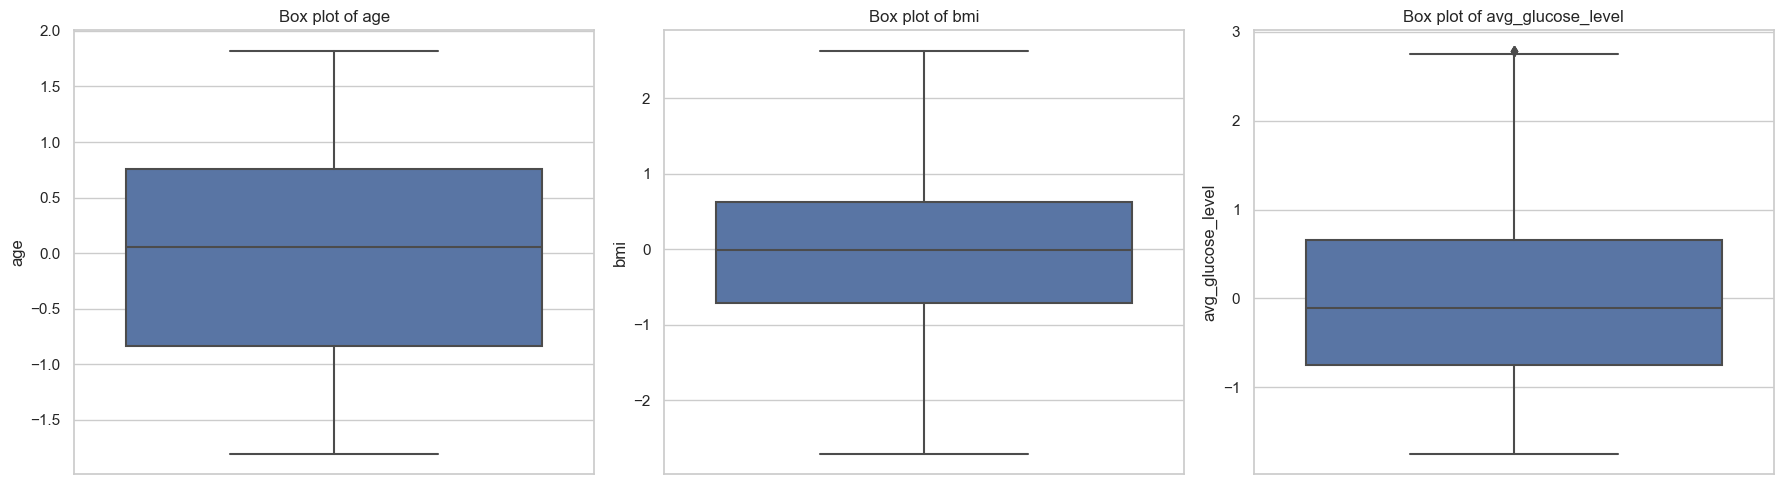

In [256]:
# Box plots
plt.figure(figsize=(18, 5))
for i, var in enumerate(numeric_columns, 1):
    plt.subplot(1, 3, i)
    snb.boxplot(y=df[var])
    plt.title(f'Box plot of {var}')
    plt.ylabel(var)
plt.tight_layout()
plt.show()

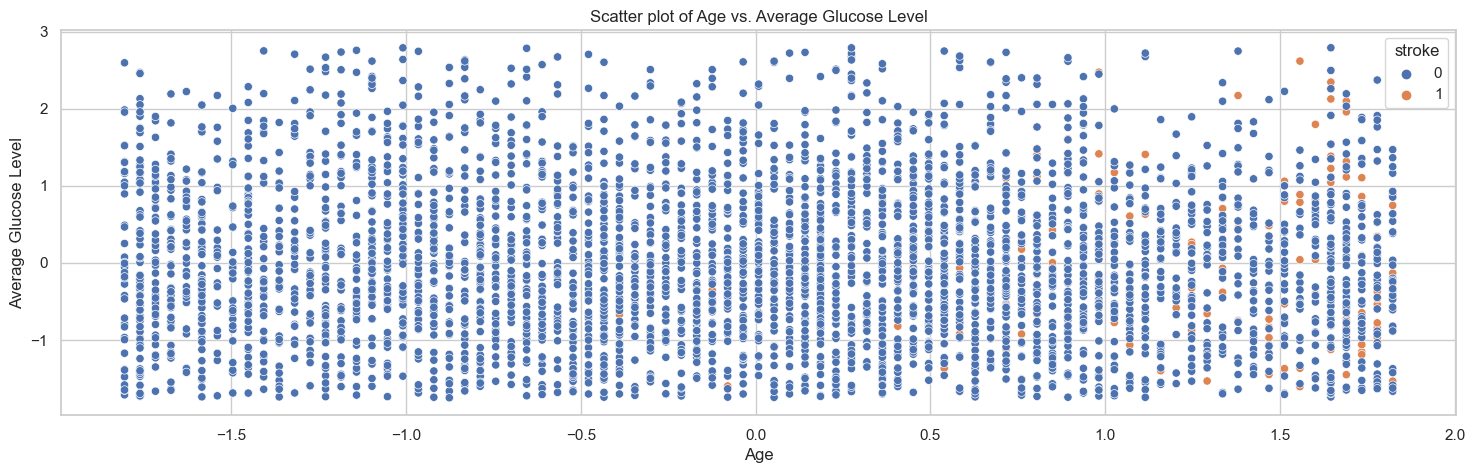

In [257]:
# Scatter plot and Pairplot for numerical variables
plt.figure(figsize=(18, 5))
snb.scatterplot(data=df, x='age', y='avg_glucose_level', hue='stroke')
plt.title('Scatter plot of Age vs. Average Glucose Level')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

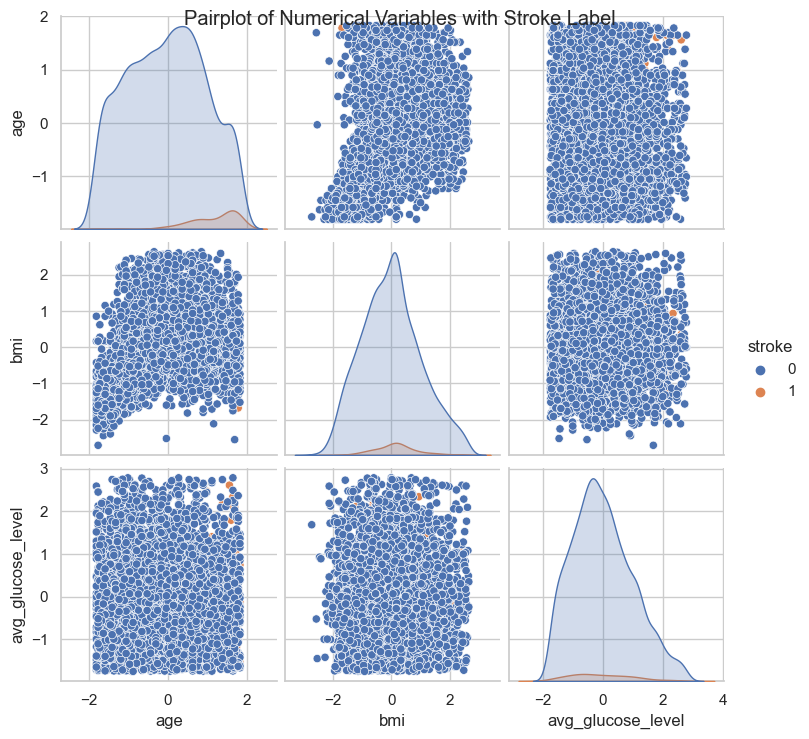

In [258]:
snb.pairplot(df[numeric_columns + ['stroke']], hue='stroke', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables with Stroke Label')
plt.show()

### Correlation Analysis

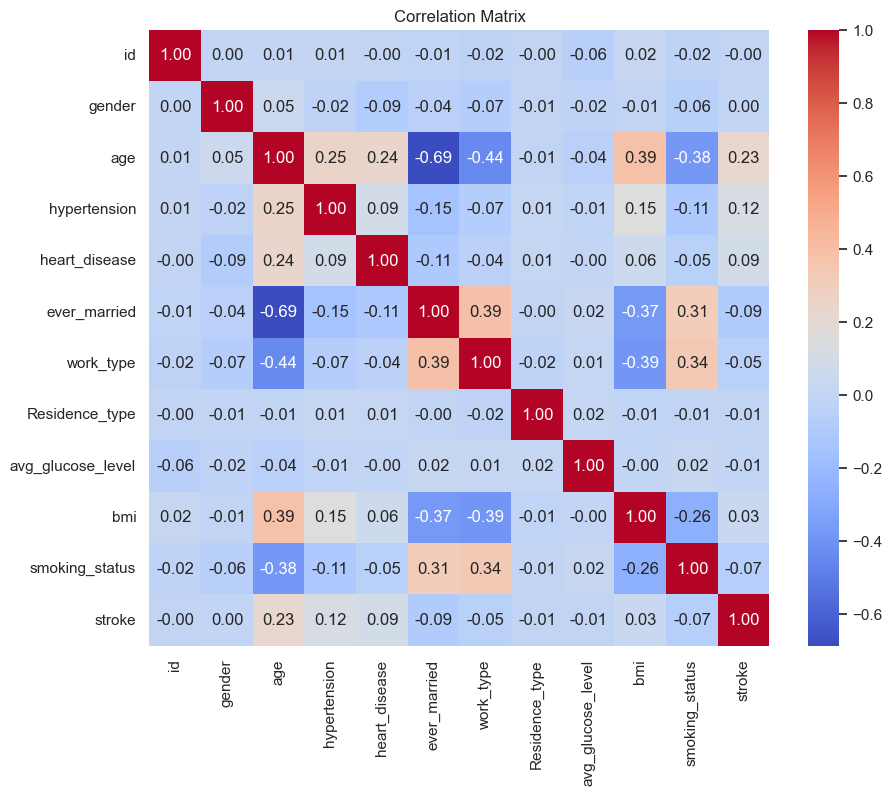

In [259]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
snb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## Model Building

In [260]:
# df = df.drop(['id','Residence_type','avg_glucose_level'],axis=1)
# df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,bmi,smoking_status,stroke
2,0,1.733949,0,1,0,0,0.757026,1,1
6,0,1.468522,1,1,0,0,-0.039587,1,1
7,1,1.247333,0,0,1,0,-0.758100,1,1
8,1,0.804954,0,0,0,0,0.163471,3,1
9,1,1.645473,0,0,0,0,-0.539422,3,1


In [261]:
# feature_names = X_train.columns.tolist()
# feature_names

In [262]:
# # Get the list of feature names from X_test
# pred_feature_names = X_test.columns.tolist()

# # Compare the feature names from X_train and X_test
# if feature_names == pred_feature_names:
#     print("Feature order matches between training and testing data.")
# else:
#     print("Feature order does not match between training and testing data.")
#     print("Feature names in X_train:", feature_names)
#     print("Feature names in X_test:", pred_feature_names)

In [263]:
# independent_cols = ['age','gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type','bmi','smoking_status']
# dependent_cols = 'stroke'

In [264]:
# import statsmodels.api as sm
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [265]:
# # Split data into train and test sets
# X = df[independent_cols]
# y = df[dependent_cols]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [266]:
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)

LogisticRegression()

In [267]:
# import pickle

# # Save the model to a .pkl file
# with open('F:/Github/Stroke_Prediction_System-Machine_Learning_Approach/model.pkl', 'wb') as file:
#     pickle.dump(log_reg, file)

##### Logistic Regression

In [268]:
# log_reg = LogisticRegression()
# log_reg.fit(X_train, y_train)

LogisticRegression()

In [269]:
# # Predict on test set
# y_pred = log_reg.predict(X_test)

In [270]:
# # Model evaluation
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))
# print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9536266349583828

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98       802
           1       0.00      0.00      0.00        39

    accuracy                           0.95       841
   macro avg       0.48      0.50      0.49       841
weighted avg       0.91      0.95      0.93       841


Confusion Matrix:
 [[802   0]
 [ 39   0]]


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [271]:
# #Interpret coefficients
# coefficients = pd.DataFrame(log_reg.coef_, columns=X.columns)
# intercept = log_reg.intercept_
# print("\nCoefficients:")
# print(coefficients)
# print("\nIntercept:", intercept)


Coefficients:
        age    gender  hypertension  heart_disease  ever_married  work_type  \
0  1.674269 -0.022851      0.509031         0.1605      0.411574  -0.183012   

      bmi  smoking_status  
0 -0.0542       -0.073714  

Intercept: [-4.35377794]


## REGRESSION ANALYSIS